# 3. Polynomial Regression(다항회귀)

- 앞에서 작업했던 것처럼 데이터의 형태가 직선 하나로 표현될 수 있는 것은 아님
- 그래프 예제(https://towardsdatascience.com/polynomial-regression-bbe8b9d97491)
<img src='https://miro.medium.com/max/700/1*zOl_ztYqnzyWRkBffeOsRQ.png'>


## 공식  <h3> y = b + m<sub>1</sub>x + m<sub>2</sub>x<sup>2</sup> + m<sub>3</sub>x<sup>3</sup> + ....... + m<sub>n</sub>x<sup>n</sup></h3>
    - 독립변수 x 를 확장하는 방식

#### [참고] https://arachnoid.com/polysolve/

### 공부 시간에 따른 시험 점수 (우등생)

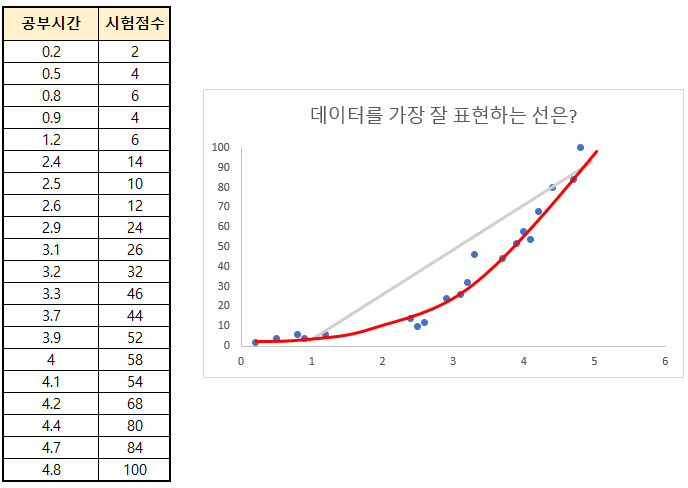

### 과대 적합

### 사이킷런 과소적합/과대적합

- https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html